In [1]:
%matplotlib nbagg
%matplotlib inline
import MDAnalysis as mda
import MDAnalysis.analysis.leaflet
import matplotlib
import numpy as np
from scipy.optimize import curve_fit
from numpy.polynomial import polynomial as P
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import nglview as nv
import copy
import warnings
warnings.filterwarnings('ignore')

# name and files for the simulation studied

name = '_DPPC_DIPC_chol'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol/'

path2 = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol/dynamics/'

fgro = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1.xtc'

# name and files for the simulation studied LPT

name = '_DPPC_DIPC_chol'

path = '/users/cornet/Documents/PhD/Matthieu/3-5-2/sans_GM1/'
path_data = path
path_res = path

fgro = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1.xtc'

In [2]:
# name and files for the simulation studied LPT

name = '_POPC_tension'

path = '/users/cornet/Documents/PhD/Matthieu/POPC_tension/pbc/'
path_data = path
path_res = '/users/cornet/Documents/PhD/Matthieu/POPC_tension/res/'

fgro = 'run_POPC_43nm_st_now_st_fixed_t1_ref4999ns.gro'
fxtc = 'run_POPC_43nm_st_now_st_fixed_t1.xtc'

In [3]:
# load gro and xtc files
u = mda.Universe( path+fgro, path+fxtc)

In [4]:
sel_all = u.select_atoms("all and resname POPC")
#u.atoms[9400:9401].residues

In [5]:
# visualize the bilayer and choose the frame to study

v= nv.show_mdanalysis(sel_all)
v.add_spacefill(sel_all, scale=2.0)
v

A Jupyter Widget

In [7]:
time_simu = 5 # microseconds
nb_frames_simu = 5000

# Normal fluctuations

In [8]:
# select the atoms in the membrane and divide the bilayer into 2 leaflets selecting the species you want

sel_tot = "all and (name PO4 or name GM1)"


u.trajectory[2]
Lf = mda.analysis.leaflet.LeafletFinder(u, 'name PO4 or name GM1')
leaflet0 = Lf.groups(0)
leaflet1 = Lf.groups(1)

l0 = leaflet0.select_atoms(sel_tot).positions
l1 = leaflet1.select_atoms(sel_tot).positions
m_tot = u.select_atoms(sel_tot).positions

print('total number of lipids: %d' % len(m_tot))
print('number of lipids in the upper leaflet: %d + number of lipids in the lower leaflet:%d \n= %d' % (len(l0),len(l1),len(l0)+len(l1)))

if (len(m_tot) != len(l0)+len(l1) ):
    print('PROBLEM!')

total number of lipids: 5416
number of lipids in the upper leaflet: 2708 + number of lipids in the lower leaflet:2708 
= 5416


In [9]:
N = 15

nb_frames_simu = 5000
tmes = 10
t_start = 1000

nb_frames = int(nb_frames_simu/tmes)
h_t = np.zeros((nb_frames,N,N))
frame = 0

In [10]:
for ts in u.trajectory:
     if (ts.frame%tmes == 0 and ts.frame>=t_start):
            
            print(ts.frame)

            patch = u.select_atoms(sel_tot).positions
            
            xmax = max(patch[:,0])
            ymax = max(patch[:,1])
            
            xmin = min(patch[:,0])
            ymin = min(patch[:,1])
            
            dx = (xmax-xmin)/N
            dy = (ymax-ymin)/N
           

            # leaflet 0 -----------------------------------------------------------------------------------------------------
            
            bary0 = []

            for i in range(0,N):
                xs = xmin + i*dx
                for j in range(0,N):
                    ys = ymin + j*dy

                    # barycenter of all molecules in each box
                    sel= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+")"
                    b0=leaflet0.select_atoms(sel).centroid().tolist()
                    bary0.append(b0)

            bary0=np.array(bary0)
            if (len(bary0) != 225):
                print('pb leaflet0')
            
            # leaflet 1 -----------------------------------------------------------------------------------------------------
            
            bary1 = []

            for i in range(0,N):
                xs = xmin + i*dx
                for j in range(0,N):
                    ys = ymin + j*dy

                    # barycenter of all molecules in each box
                    sel= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+")"
                    b1=leaflet1.select_atoms(sel).centroid().tolist()
                    bary1.append(b1)

            bary1=np.array(bary1)
            if (len(bary1) != 225):
                print('pb leaflet1')
            
            # median leaflet -----------------------------------------------------------------------------------------------------
            bary=(bary0+bary1)/2
            
            h_t[frame]=bary[:,2].reshape(15,15) # median leaflet height function
            
            plt.imshow(h_t[frame])
            plt.savefig(path_res+'im'+name+'_t'+str(ts.frame)+'.pdf', format='pdf',bbox_inches='tight')
            plt.clf()
            
            frame+=1

1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2220
2230
2240
2250
2260
2270
2280
2290
2300
2310
2320
2330
2340
2350
2360
2370
2380
2390
2400
2410
2420
2430
2440
2450
2460
2470
2480
2490
2500
2510
2520
2530
2540
2550
2560
2570
2580
2590
2600
2610
2620
2630
2640
2650
2660
2670
2680
2690
2700
2710
2720
2730
2740
2750
2760
2770
2780
2790
2800
2810
2820
2830
2840
2850
2860
2870
2880
2890
2900
2910
2920
2930
2940
2950
2960
2970
2980
2990


In [11]:
#print(h_t)
print(nb_frames)
print(frame)

500
400


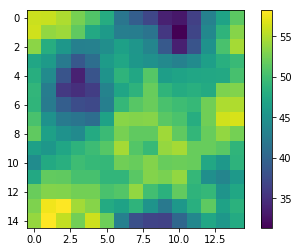

In [12]:
plt.imshow(h_t[200])
plt.colorbar()

In [14]:
file = open(path_res+'h_POPC.txt', 'w')

for f in range(frame-1):
    for i in range(N):
        for j in range(N):
            file.write('%f' % h_t[f,i,j])
            file.write(' ')
        file.write('\n')
    file.write('\n')
file.close()          

In [10]:
print(h_t[:,191])
print(nb_frames)

[47.50795746 46.00727367 46.23619747 47.760005   50.02966118 51.24673843
 49.93706608 49.55834007 44.50454044 39.03500366 36.9056654  35.3461132
 34.96944952 41.91904831 47.63777924 46.41154385 45.3782692  48.45808315
 49.43605232 51.48727608 54.05196953 52.60777855 49.61431313 41.58630753
 40.12545586 37.04395485 38.08350563 40.28442478 44.99813557 47.14772606
 46.10733891 51.44049454 51.18486118 49.37572765 50.00495529 55.44111443
 53.51167297 49.91945553 43.82908821 39.53841782 40.71450138 42.65361404
 45.72319317 48.27878857 48.75216866 50.40894127 51.2635479  50.03545761
 52.5624218  54.12142181 55.5886116  53.14207268 47.39004517 42.04236126
 39.24208736 37.86050034 40.27772999 44.9191103  47.80350018 47.32262707
 50.58603096 52.19889069 54.68919754 55.43455505 55.36667061 56.43030548
 52.72762489 45.8120842  37.05454731 33.42904949 33.34083462 37.02346516
 42.52605152 46.2066679  48.23391819 49.78092861 49.41767216 52.28808594
 55.708004   54.96776962 53.50625229 51.05021477 42.

In [32]:
np.save(path_res+'h_fluctu'+name+'.npy', h_t)

In [33]:
for i in range(N*N):
    for t in range(nb_frames):
        if (np.isnan(h_t[i,t])):
            print(t)

In [34]:
smax = 20

h_co_box = np.zeros(smax)
h_co_box_norm = np.zeros(smax)

for i in range(N*N):
    h_co = np.zeros(smax)
    for s in range(smax):
        for t in range(nb_frames-s):
            h_co[s] = h_co[s] + h_t[i,t+s]*h_t[i,t]
        h_co[s] = h_co[s]/(nb_frames-s) - np.mean(h_t[i,:])**2 
        h_co_box[s] = h_co_box[s]+h_co[s]

for s in range(smax):
    h_co_box_norm[s] = h_co_box[s]/N/N
print(h_co_box_norm)

[596.59271066 574.19399938 570.34814702 569.62552258 568.248978
 567.36564942 566.15216541 564.97817955 563.73281259 562.72115892
 561.23353403 560.29933332 559.61098784 558.11865414 556.76199742
 556.0325951  554.65410819 553.05774608 552.8853106  551.72456072]


[360.66417378  30.         373.89244536  30.        ]


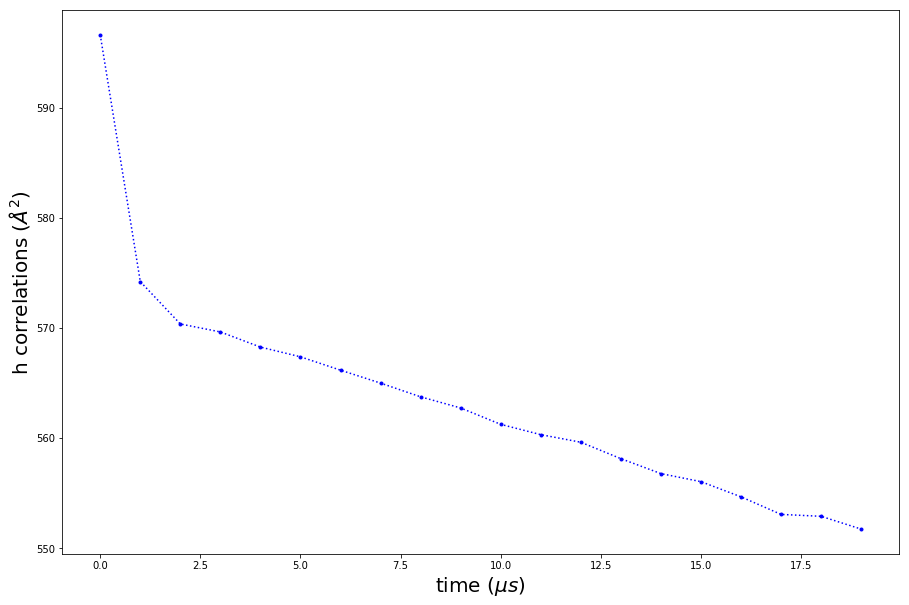

In [50]:
fig, ax = plt.subplots(figsize=(15, 10))

s = np.arange(smax)
y = h_co_box_norm

def fitFunc(t,A1,tau1,A2,tau2):
        return A1*np.exp(-t/tau1)+A2*np.exp(-t/tau2)

param_bounds=([0,0.5,0,0.5],[5000,30,5000,30])

param, stat = curve_fit(fitFunc,s,y, bounds=param_bounds)

#ax.plot(s,fitFunc(s, *param), 'red')
ax.plot(s,y, ':b.')

plt.xlabel('time ($\mu s$)', fontsize=20)
plt.ylabel('h correlations ($\AA^2$)', fontsize=20)

#plt.annotate('$ \\tau_1 \\approx %.2f$ $10^{-8}s $ \n $ \\tau_2 \\approx %.2f$ $10^{-8}s $' % (param[1],param[3]), color='g', fontsize=22, style='italic', xy=(8,580), xytext=(4,580))
print(param)
plt.savefig(path+'h_correl'+name+'.pdf', format='pdf',bbox_inches='tight')